In [1]:
# 使用jupyter notebook 要加：
%matplotlib inline

import requests
import pandas as pd
import json
import numpy as np
# conda install seaborn
import seaborn as sns

In [10]:
# 用function將程式碼打包，方便我們多次使用，這行的意思就是宣告一個可呼叫的程式區塊，叫做crawl_price(stock_id)
def crawl_price(stock_id):

    url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2=1549258857&interval=1d&events=history&=hP2rOschxO0"

    res = requests.get(url)
    data = json.loads(res.text)
# 用dataframe取股價各值，用一般string形式拔小時
    data_index=pd.to_datetime(data['chart']['result'][0]['timestamp'],unit='s')
    data_index=data_index.strftime('%Y/%m/%d')
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=data_index, columns=['open','high','low','close','volume'])
# 日期索引值欄位名稱設定
    df=df.rename_axis("Date")
    # df.index.dt.strftime('%y-%m-%d')
# 開高低收設定
    # df=df.rename_axis("stock_price", axis="columns")
    return df


In [11]:
# del測試區
# crawl_price('^BUK100P')
# crawl_price('2330.tw')

# url = "https://query1.finance.yahoo.com/v8/finance/chart/^BUK100P?period1=0&period2=1549258857&interval=1d&events=history&=hP2rOschxO0"
# res = requests.get(url)
# data = json.loads(res.text)

# 將小時拔掉！！！！！！！！！！！我debug de了3小時，注意看

# 用一般string形式改時間拔小時
# data_index = pd.to_datetime(data['chart']['result'][0]['timestamp'],unit='s')
# data_index = data_index.strftime('%Y/%m/%d')
# data_index 
# # (Index object)

# 用dataframe改時間拔小時
# df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(data['chart']['result'][0]['timestamp'],unit='s'), columns=['open','high','low','close','volume'])
# df.index=df.index.normalize()
# df.index
# (DataTimeIndex datatime64[ns])

,open,high,low,close,volume
Date,,,,,
2010/09/17,9322.789062,9322.789062,9322.789062,9322.789062,0
2010/09/20,9462.742188,9462.742188,9462.742188,9462.742188,0
2010/09/21,9441.243164,9441.243164,9441.243164,9441.243164,0
2010/09/22,9404.410156,9404.410156,9404.410156,9404.410156,0
2010/09/23,9366.033203,9366.033203,9366.033203,9366.033203,0
...,...,...,...,...,...
2019/01/28,11464.389648,11464.389648,11464.389648,11464.389648,0
2019/01/29,11601.330078,11601.330078,11601.330078,11601.330078,0
2019/01/30,11601.330078,11833.610352,11601.330078,11780.450195,0


In [161]:
# 1.爬蟲國際股市
url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

import io
# 2.用IO表示虛擬EXCEL檔案，建立國際股市對照表
f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]
world_index

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,2874.56,+75.01,+2.68%,3.555B,NaN,NaN,NaN
1,^DJI,Dow 30,24242.49,+704.79,+2.99%,530.278M,NaN,NaN,NaN
2,^IXIC,Nasdaq,8650.14,+117.78,+1.38%,3.916B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),11208.29,+390.29,+3.61%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,1739.79,+61.44,+3.66%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100 Price Return,9752.35,+206.05,+2.16%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1229.10,+51.01,+4.33%,0,NaN,NaN,NaN
7,^VIX,Vix,38.15,-1.96,-4.89%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,5786.96,+158.53,+2.82%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,10625.78,+324.28,+3.15%,0,NaN,NaN,NaN


In [162]:
# 抓取全球指數
import time
world_index_history = {}
# 3.用國際股市對照表建立個股江波圖
for symbol, name in zip(world_index['Symbol'], world_index['Name']):  
    print(name)  
    world_index_history[name] = crawl_price(symbol)
    # time.sleep(1)

S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index


KeyError: 'timestamp'

In [54]:
# 畫圖+world_index_history測試區
# for name, history in world_index_history.items():
#     history.close.plot()

# world_index_history['S&P 500']['close'].plot()
# world_index_history['Cboe UK 100 Price Return']['close']
# world_index_history

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [163]:
# 4.多股收盤價表
close = {}
for name, price in world_index_history.items():
    if price.index.is_unique:
        close[name] = price['close']
    
close = pd.DataFrame(close)

# 將S&P 500空缺值拔掉
# close=close.dropna(subset=['S&P 500'])
# 5.做相關性分析
corr=close.corr()

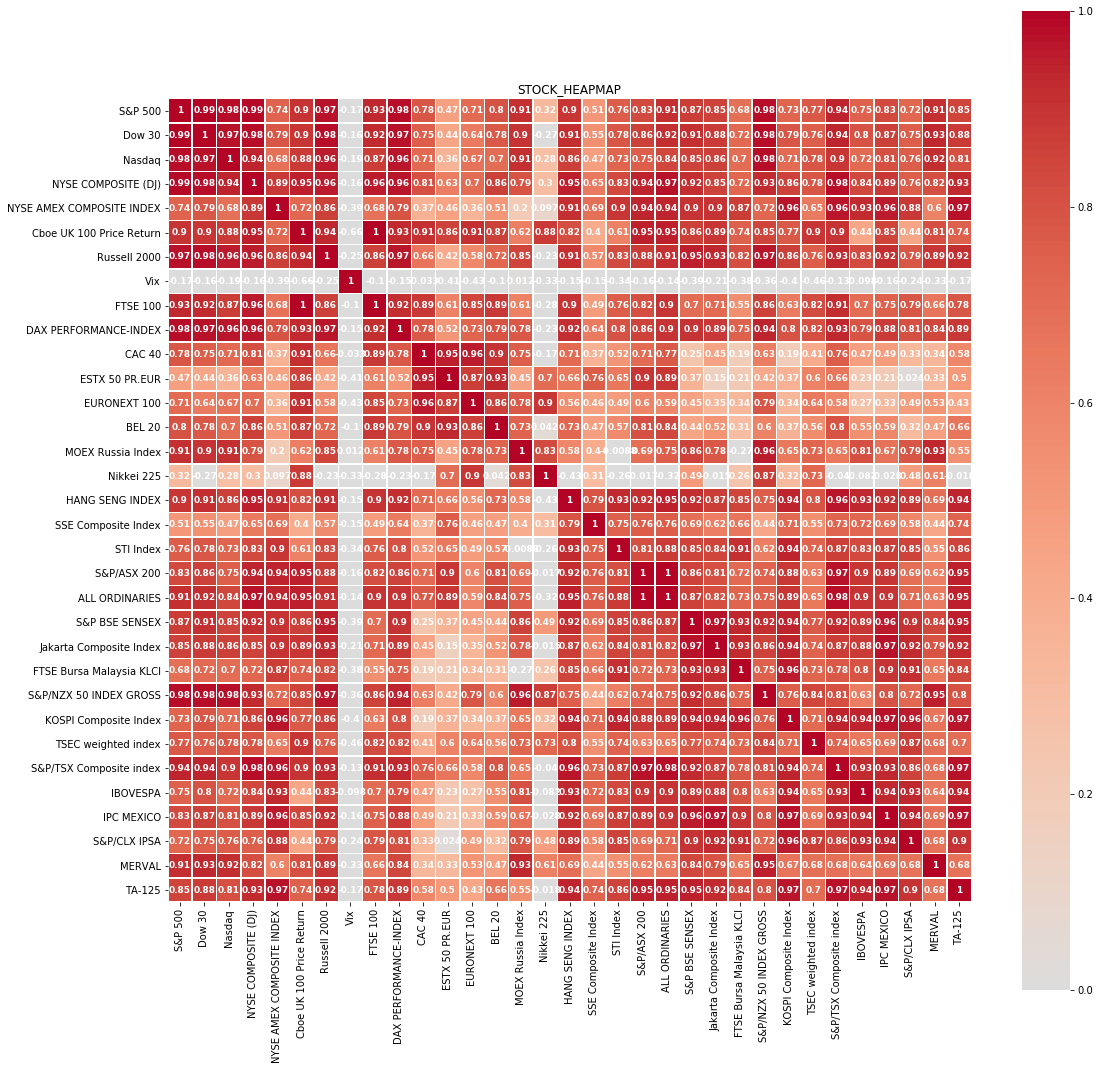

In [164]:
# 6.做相關性熱點圖
# set figure size
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)

# vmin, vmax : 显示的数据值的最大和最小的范围
# annot : 如果为True，则将数据值写入每个单元格中
# cmap : matplotlib颜色表名称或对象，或颜色列表，可选从数据值到色彩空间的映射。如果没有提供，默认设置(coolwarm,bwr,seismic)
# ax2.set_title('matplotlib colormap')
# ax2.set_xlabel('region')
# ax2.set_ylabel('kind')

HM=sns.heatmap(corr, square=True ,vmin=0.0,vmax=1.0, cmap = 'coolwarm',linecolor='white',linewidths=.5, center=0, annot=True, annot_kws={'size':9,'weight':'bold', 'color':'white'})
HM.set_title('STOCK_HEAPMAP')
HM

In [170]:
# 額外
close['Cboe UK 100 Price Return']['2015':].plot()
close['TSEC weighted index']['2015':].plot()


Date
2015-01-01            NaN
2015-01-02            NaN
2015-01-04            NaN
2015-01-05    9274.110352
2015-01-06    9048.339844
                 ...     
2019-01-30    9932.259766
2019-01-31            NaN
2019-02-01            NaN
2019-02-03            NaN
2019-02-04            NaN
Name: TSEC weighted index, Length: 1287, dtype: float64